In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("training.1600000.processed.noemoticon.csv",header=None, names=cols, encoding = 'latin-1')
# above line will be different depending on where you saved your data, and your file name
df3.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [2]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [9]:
df.sentiment.value_counts()

4    809206
0    807072
2    139782
Name: sentiment, dtype: int64

In [10]:
df[df.sentiment == 0].head(10)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [11]:
df[df.sentiment == 4].head(10)

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
800005,4,@ProductOfFear You can tell him that I just bu...
800006,4,@r_keith_hill Thans for your response. Ihad al...
800007,4,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [12]:
df['pre_clean_len'] = [len(t) for t in df.text]

In [13]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 2:neutral, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}
pprint(data_dict)

{'dataset_shape': (1756060, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 2:neutral, '
                              '1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


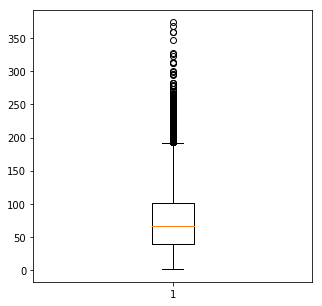

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [15]:
df[df.pre_clean_len > 140].head(10)

,sentiment,text,pre_clean_len
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141
1064,0,Why do I keep looking...I know that what I rea...,141


In [16]:
df.text[279]

"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [17]:
from bs4 import BeautifulSoup
Ex = BeautifulSoup(df.text[279], 'lxml')
print(Ex.get_text())

Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. 


In [18]:
import re
df.any()

sentiment        True
text             True
pre_clean_len    True
dtype: bool

In [19]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result


['awww that s a bummer you shoulda got david carr of third day to do it d',
 'is upset that he can t update his facebook by texting it and might cry as a result school today also blah',
 'i dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it s not behaving at all i m mad why am i here because i can t see you all over there',
 'not the whole crew',
 'need a hug',
 'hey long time no see yes rains a bit only a bit lol i m fine thanks how s you',
 'k nope they didn t have it',
 'que me muera',
 'spring break in plain city it s snowing',
 'i just re pierced my ears',
 'i couldn t bear to watch it and i thought the ua loss was embarrassing',
 'it it counts idk why i did either you never talk to me anymore',
 'i would ve been the first but i didn t have a gun not really though zac snyder s just a doucheclown',
 'i wish i got to watch it with you i miss you and how was the premiere',
 'hollis death scene will hurt

In [20]:

print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(len(df)):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, len(df) ))                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 10000 of 1756060 has been processed
Tweets 20000 of 1756060 has been processed
Tweets 30000 of 1756060 has been processed
Tweets 40000 of 1756060 has been processed
Tweets 50000 of 1756060 has been processed
Tweets 60000 of 1756060 has been processed
Tweets 70000 of 1756060 has been processed
Tweets 80000 of 1756060 has been processed
Tweets 90000 of 1756060 has been processed
Tweets 100000 of 1756060 has been processed
Tweets 110000 of 1756060 has been processed
Tweets 120000 of 1756060 has been processed
Tweets 130000 of 1756060 has been processed
Tweets 140000 of 1756060 has been processed
Tweets 150000 of 1756060 has been processed
Tweets 160000 of 1756060 has been processed
Tweets 170000 of 1756060 has been processed
Tweets 180000 of 1756060 has been processed
Tweets 190000 of 1756060 has been processed
Tweets 200000 of 1756060 has been processed
Tweets 210000 of 1756060 has been processed
Tweets 220000 of 1756060 has been processed
Tweet

C:\Users\maste\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b' i just received my G8 viola exam.. and its... well... .. disappointing.. :\\..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 770000 of 1756060 has been processed
Tweets 780000 of 1756060 has been processed
Tweets 790000 of 1756060 has been processed
Tweets 800000 of 1756060 has been processed
Tweets 810000 of 1756060 has been processed
Tweets 820000 of 1756060 has been processed
Tweets 830000 of 1756060 has been processed
Tweets 840000 of 1756060 has been processed
Tweets 850000 of 1756060 has been processed
Tweets 860000 of 1756060 has been processed
Tweets 870000 of 1756060 has been processed
Tweets 880000 of 1756060 has been processed
Tweets 890000 of 1756060 has been processed
Tweets 900000 of 1756060 has been processed
Tweets 910000 of 1756060 has been processed
Tweets 920000 of 1756060 has been processed
Tweets 930000 of 1756060 has been processed
Tweets 940000 of 1756060 has been processed
Tweets 950000 of 1756060 has been processed
Tweets 960000 of 1756060 has been processed
Tweets 970000 of 1756060 has been processed
Tweets 980000 of 1756060 has been processed
Tweets 990000 of 1756060 has bee

C:\Users\maste\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'E3 ON PLAYSTATION HOME IN ABOUT AN HOUR!!!!!!!!!! \\../  \\../'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 1300000 of 1756060 has been processed
Tweets 1310000 of 1756060 has been processed
Tweets 1320000 of 1756060 has been processed
Tweets 1330000 of 1756060 has been processed
Tweets 1340000 of 1756060 has been processed
Tweets 1350000 of 1756060 has been processed
Tweets 1360000 of 1756060 has been processed
Tweets 1370000 of 1756060 has been processed
Tweets 1380000 of 1756060 has been processed
Tweets 1390000 of 1756060 has been processed
Tweets 1400000 of 1756060 has been processed
Tweets 1410000 of 1756060 has been processed
Tweets 1420000 of 1756060 has been processed
Tweets 1430000 of 1756060 has been processed
Tweets 1440000 of 1756060 has been processed
Tweets 1450000 of 1756060 has been processed
Tweets 1460000 of 1756060 has been processed
Tweets 1470000 of 1756060 has been processed
Tweets 1480000 of 1756060 has been processed
Tweets 1490000 of 1756060 has been processed
Tweets 1500000 of 1756060 has been processed
Tweets 1510000 of 1756060 has been processed
Tweets 152

C:\Users\maste\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\maste\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 1610000 of 1756060 has been processed
Tweets 1620000 of 1756060 has been processed
Tweets 1630000 of 1756060 has been processed
Tweets 1640000 of 1756060 has been processed
Tweets 1650000 of 1756060 has been processed
Tweets 1660000 of 1756060 has been processed
Tweets 1670000 of 1756060 has been processed
Tweets 1680000 of 1756060 has been processed
Tweets 1690000 of 1756060 has been processed
Tweets 1700000 of 1756060 has been processed
Tweets 1710000 of 1756060 has been processed
Tweets 1720000 of 1756060 has been processed
Tweets 1730000 of 1756060 has been processed
Tweets 1740000 of 1756060 has been processed
Tweets 1750000 of 1756060 has been processed


In [21]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [22]:
# clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

C:\Users\maste\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [23]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [24]:
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

C:\Users\maste\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [25]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1756060 entries, 0 to 1756059
Data columns (total 2 columns):
text      object
target    int64
dtypes: int64(1), object(1)
memory usage: 40.2+ MB


In [26]:
my_df[my_df.isnull().any(axis=1)].head()

,text,target
208,NaN,0
249,NaN,0
398,NaN,0
430,NaN,0
1011,NaN,0


In [27]:
np.sum(my_df.isnull().any(axis=1))

3404

In [28]:
my_df.isnull().any(axis=0)

text       True
target    False
dtype: bool

In [29]:
df.iloc[my_df[my_df.isnull().any(axis=1)].index,:].head()

,sentiment,text,pre_clean_len
208,0,@mandayyy,10
249,0,@mandayyy,12
398,0,@danadearmond,14
430,0,@anistorm,10
1011,0,@citizensheep,14


In [30]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752656 entries, 0 to 1752655
Data columns (total 2 columns):
text      object
target    int64
dtypes: int64(1), object(1)
memory usage: 26.7+ MB


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(min_df = 1)
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [32]:
len(cvec.get_feature_names())

275598

In [33]:
document_matrix = cvec.transform(my_df.text)
my_df[my_df.target == 0].tail()

,text,target
1752561,has turned out nearly hours of unfocused excru...,0
1752563,turned out nearly hours of unfocused excruciat...,0
1752566,of unfocused excruciatingly tedious cinema,0
1752567,unfocused excruciatingly tedious cinema,0
1752569,excruciatingly tedious,0


In [34]:
%%time
neg_batches = np.linspace(0,798503,100).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neg_batches)-2):
        print (neg_batches[i+1],"entries' term freuquency calculated")
    i += 1


8065 entries' term freuquency calculated
88722 entries' term freuquency calculated
169379 entries' term freuquency calculated
250036 entries' term freuquency calculated
330693 entries' term freuquency calculated
411350 entries' term freuquency calculated
492006 entries' term freuquency calculated
572663 entries' term freuquency calculated
653320 entries' term freuquency calculated
733977 entries' term freuquency calculated
798503 entries' term freuquency calculated
Wall time: 18min 4s


In [35]:
my_df.tail()

,text,target
1752651,hearst s,2
1752652,forced avuncular chortles,2
1752653,avuncular chortles,2
1752654,avuncular,2
1752655,chortles,2


In [36]:
%%time
pos_batches = np.linspace(798503,1596753,100).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(pos_batches)-2):
        print (pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

806566 entries' term freuquency calculated
887197 entries' term freuquency calculated
967828 entries' term freuquency calculated
1048460 entries' term freuquency calculated
1129091 entries' term freuquency calculated
1209722 entries' term freuquency calculated
1290354 entries' term freuquency calculated
1370985 entries' term freuquency calculated
1451616 entries' term freuquency calculated
1532247 entries' term freuquency calculated
1596753 entries' term freuquency calculated
Wall time: 18min 4s


In [37]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.head()

,0,1
aa,131,72
aaa,74,36
aaaa,30,20
aaaaa,22,9
aaaaaa,13,9


In [38]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
to,313188,252600,565788
the,257995,266183,524178
my,190891,126008,316899
it,157530,147866,305396
and,154000,149701,303701
you,103915,198384,302299
is,128135,109065,237200
in,115629,101304,216933
for,99048,117393,216441
of,92837,91219,184056


In [39]:
X = my_df.text
y = my_df.target 
print(X.shape) 
print(y.shape) 

(1752656,)
(1752656,)


In [40]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 1) 


C:\Users\maste\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df= 1, analyzer = "word", ngram_range=(1,3))

In [42]:
csv = 'clean_tweet2.csv'
my_df2 = pd.read_csv(csv,index_col=0)
my_df2.head()

,body,target
0,snapchat so worthless now,2018-07-24T04:01:00.000Z
1,snapchat lame just text me,2018-07-24T04:12:37.000Z
2,if your bff doesn share her his location with ...,2018-07-24T04:14:42.000Z
3,doing shit for twitter instagram snapchat or f...,2018-07-24T04:19:46.000Z
4,your mcm typed out violence isn the answer on ...,2018-07-24T04:23:22.000Z


In [43]:
X_train.head()

1264021                  but that chatroom was sooo much fun
631253           burke yuumm sounds delicious now i want one
1709541    have come to assume is just another day of bri...
180312                           just ran over my first bird
1691196                                         giant screen
Name: text, dtype: object

In [44]:
vect.fit(X_train)
X_train_dtm = vect.transform(X_train) 

In [45]:
print(X_train_dtm)

  (0, 9901660)	0.2823198806063671
  (0, 9901605)	0.2248112926920593
  (0, 9865452)	0.09043047245770545
  (0, 8546582)	0.3357890362812159
  (0, 8546581)	0.3357890362812159
  (0, 8537211)	0.07790339488180498
  (0, 8054069)	0.2513193412211392
  (0, 8054027)	0.20679680771125236
  (0, 8051915)	0.15422511909730327
  (0, 5738127)	0.18122572670730744
  (0, 5733056)	0.11206749329060442
  (0, 3112155)	0.11890441341489077
  (0, 1583547)	0.3357890362812159
  (0, 1583545)	0.32637358533778754
  (0, 1583488)	0.2601316060628022
  (0, 1371475)	0.3357890362812159
  (0, 1371428)	0.18494260913631785
  (0, 1334131)	0.08275172261096826
  (1, 10692517)	0.29926184545777856
  (1, 10692516)	0.29926184545777856
  (1, 10692514)	0.27652569535126437
  (1, 9847389)	0.18336233443161745
  (1, 9840810)	0.0982544617919774
  (1, 8083019)	0.29926184545777856
  (1, 8083004)	0.2330642315293272
  :	:
  (1402123, 4346793)	0.07518605445506928
  (1402123, 4092220)	0.17499243980049997
  (1402123, 4092172)	0.12835761004904014
  (

In [46]:
X_test_dtm = vect.transform(X_test)

In [47]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(random_state=0) 

In [48]:
### Best C values = {[1,10]}
### C values already tried = {[0.01, .1, 1, 10, 100, 1000]}
## 0.773 (+/-0.003) for {'C': 0.001}
## 0.792 (+/-0.003) for {'C': 0.01}
## 0.793 (+/-0.002) for {'C': 1}
## 0.784 (+/-0.002) for {'C': 10}
## 0.779 (+/-0.003) for {'C': 100}
## 0.723 (+/-0.057) for {'C': 1000}
## 0.699 (+/-0.100) for {'C': 10000000}
## 0.697 (+/-0.085) for {'C': 100000000}
## 0.715 (+/-0.031) for {'C': 1000000000}

In [49]:
%%time
svm_clf.fit(X_train_dtm, y_train)

Wall time: 24min 44s


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [50]:
from sklearn.model_selection import cross_val_score  
accuracies = cross_val_score(estimator = svm_clf, X = X_train_dtm, y = y_train, cv = 10)
accuracies.mean()

0.8201435828132061

In [51]:
y_pred_svm = svm_clf.predict(X_test_dtm)

In [52]:
from sklearn import metrics  
metrics.accuracy_score(y_test, y_pred_svm)

0.8209407415014892

In [53]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha = 10)

In [54]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=10, class_prior=None, fit_prior=True)

In [55]:
from sklearn.model_selection import cross_val_score  
accuracies = cross_val_score(estimator = nb, X = X_train_dtm, y = y_train, cv = 10)
accuracies.mean() 

0.7345776850654882

In [56]:
y_pred_nb = nb.predict(X_test_dtm)

In [57]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_nb)

0.7345064074036036

In [58]:
my_df2.drop(['target'],axis=1,inplace=True)
my_df2.head()

,body
0,snapchat so worthless now
1,snapchat lame just text me
2,if your bff doesn share her his location with ...
3,doing shit for twitter instagram snapchat or f...
4,your mcm typed out violence isn the answer on ...


In [59]:
x2= my_df2.body
X_test2 = vect.transform(x2)
db = svm_clf.predict(X_test2)

In [68]:
((4 == db)).sum()

11201

In [61]:
# import pickle 
# filename = 'finalized_model2.0.db'
# pickle.dump(svm_clf, open(filename, 'wb'))

In [62]:
# import dill
# dill.dump_session('working_model2.0.db')